In [1]:
import torch
import torchaudio
print(torch.__version__)
print(torchaudio.__version__)

1.12.0+cu113
0.12.0+cu113


In [2]:
!pip install boto3

In [3]:
import io
import os
import tarfile
import tempfile
from os import path
from pathlib import Path

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset

In [4]:
SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")

In [5]:
SAMPLE_GSM

'C:\\Users\\ACER\\.cache\\torch\\hub\\torchaudio\\tutorial-assets\\steam-train-whistle-daniel_simon.gsm'

In [6]:
SAMPLE_WAV

'C:\\Users\\ACER\\.cache\\torch\\hub\\torchaudio\\tutorial-assets\\Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav'

In [7]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [9]:
import soundfile as sf
sf.available_formats()

{'AIFF': 'AIFF (Apple/SGI)',
 'AU': 'AU (Sun/NeXT)',
 'AVR': 'AVR (Audio Visual Research)',
 'CAF': 'CAF (Apple Core Audio File)',
 'FLAC': 'FLAC (Free Lossless Audio Codec)',
 'HTK': 'HTK (HMM Tool Kit)',
 'SVX': 'IFF (Amiga IFF/SVX8/SV16)',
 'MAT4': 'MAT4 (GNU Octave 2.0 / Matlab 4.2)',
 'MAT5': 'MAT5 (GNU Octave 2.1 / Matlab 5.0)',
 'MPC2K': 'MPC (Akai MPC 2k)',
 'OGG': 'OGG (OGG Container format)',
 'PAF': 'PAF (Ensoniq PARIS)',
 'PVF': 'PVF (Portable Voice Format)',
 'RAW': 'RAW (header-less)',
 'RF64': 'RF64 (RIFF 64)',
 'SD2': 'SD2 (Sound Designer II)',
 'SDS': 'SDS (Midi Sample Dump Standard)',
 'IRCAM': 'SF (Berkeley/IRCAM/CARL)',
 'VOC': 'VOC (Creative Labs)',
 'W64': 'W64 (SoundFoundry WAVE 64)',
 'WAV': 'WAV (Microsoft)',
 'NIST': 'WAV (NIST Sphere)',
 'WAVEX': 'WAVEX (Microsoft)',
 'WVE': 'WVE (Psion Series 3)',
 'XI': 'XI (FastTracker 2)'}

In [10]:
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [11]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV)

In [12]:
waveform

tensor([[0.0183, 0.0180, 0.0180,  ..., 0.0018, 0.0019, 0.0032]])

In [13]:
sample_rate

16000

In [14]:
import matplotlib.pyplot as plt

In [15]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

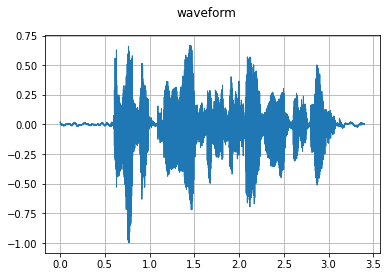

In [16]:
plot_waveform(waveform, sample_rate)

In [27]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

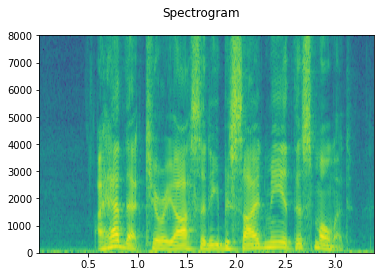

In [28]:
plot_specgram(waveform, sample_rate)

In [29]:
Audio(waveform.numpy()[0], rate=sample_rate)